In [1]:
%matplotlib widget
import obspy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

from hydrophone_data_processing import load, preprocessing, tempmatch


import matplotlib.dates as mdates

import matplotlib.ticker as ticker

class PrecisionDateFormatter(ticker.Formatter):
    """
    Extend the `matplotlib.ticker.Formatter` class to allow for millisecond
    precision when formatting a tick (in days since the epoch) with a
    `~datetime.datetime.strftime` format string.

    """

    def __init__(self, fmt, precision=3, tz=None):
        """
        Parameters
        ----------
        fmt : str
            `~datetime.datetime.strftime` format string.
        """
        from matplotlib.dates import num2date
        if tz is None:
            from matplotlib.dates import _get_rc_timezone
            tz = _get_rc_timezone()
        self.num2date = num2date
        self.fmt = fmt
        self.tz = tz
        self.precision = precision

    def __call__(self, x, pos=0):
        if x == 0:
            raise ValueError("DateFormatter found a value of x=0, which is "
                             "an illegal date; this usually occurs because "
                             "you have not informed the axis that it is "
                             "plotting dates, e.g., with ax.xaxis_date()")

        dt = self.num2date(x, self.tz)
        ms = dt.strftime("%f")[:self.precision]

        return dt.strftime(self.fmt).format(ms=ms)

    def set_tzinfo(self, tz):
        self.tz = tz

In [2]:
detectfiles = '/media/sda/data/borehole/detections/*.csv'
det = load.import_detections(detectfiles)

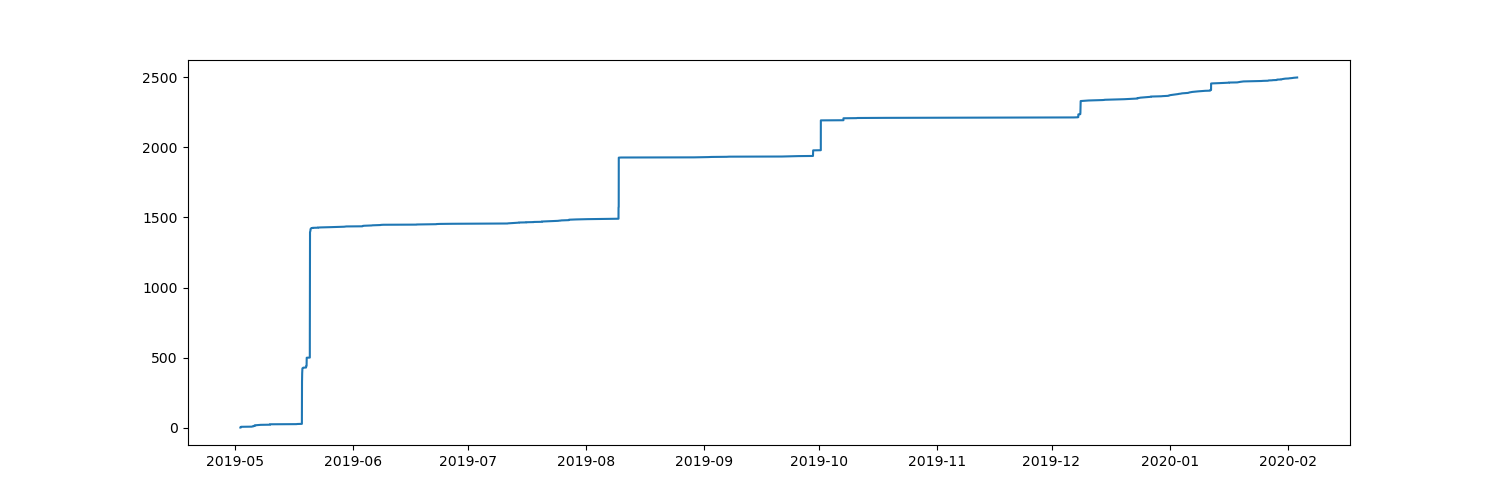

In [3]:
# x = det.time
# y = np.ones_like(x).cumsum()
# plt.figure(figsize=(15, 5))
# plt.plot(x, y)



In [12]:
paths = ['/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.221'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.2019.221'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.03.GDH.2019.221'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.04.GDH.2019.221'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.05.GDH.2019.221'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.06.GDH.2019.221']

stream = load.import_corrected_data_for_single_day(paths=paths)
# stream.filter(type='highpass', corners=4, zerophase=True, freq=40)
stream.decimate(factor=10)

6 Trace(s) in Stream:
7F.B00.01.GDH | 2019-08-09T00:00:00.681000Z - 2019-08-10T00:00:01.081000Z | 100.0 Hz, 8640041 samples
7F.B00.02.GDH | 2019-08-09T00:00:01.449000Z - 2019-08-10T00:00:03.029000Z | 100.0 Hz, 8640159 samples
7F.B00.03.GDH | 2019-08-09T00:00:03.848000Z - 2019-08-10T00:00:02.788000Z | 100.0 Hz, 8639895 samples
7F.B00.04.GDH | 2019-08-09T00:00:01.333000Z - 2019-08-10T00:00:02.893000Z | 100.0 Hz, 8640157 samples
7F.B00.05.GDH | 2019-08-09T00:00:00.332000Z - 2019-08-10T00:00:01.622000Z | 100.0 Hz, 8640130 samples
7F.B00.06.GDH | 2019-08-09T00:00:01.578000Z - 2019-08-10T00:00:00.868000Z | 100.0 Hz, 8639930 samples

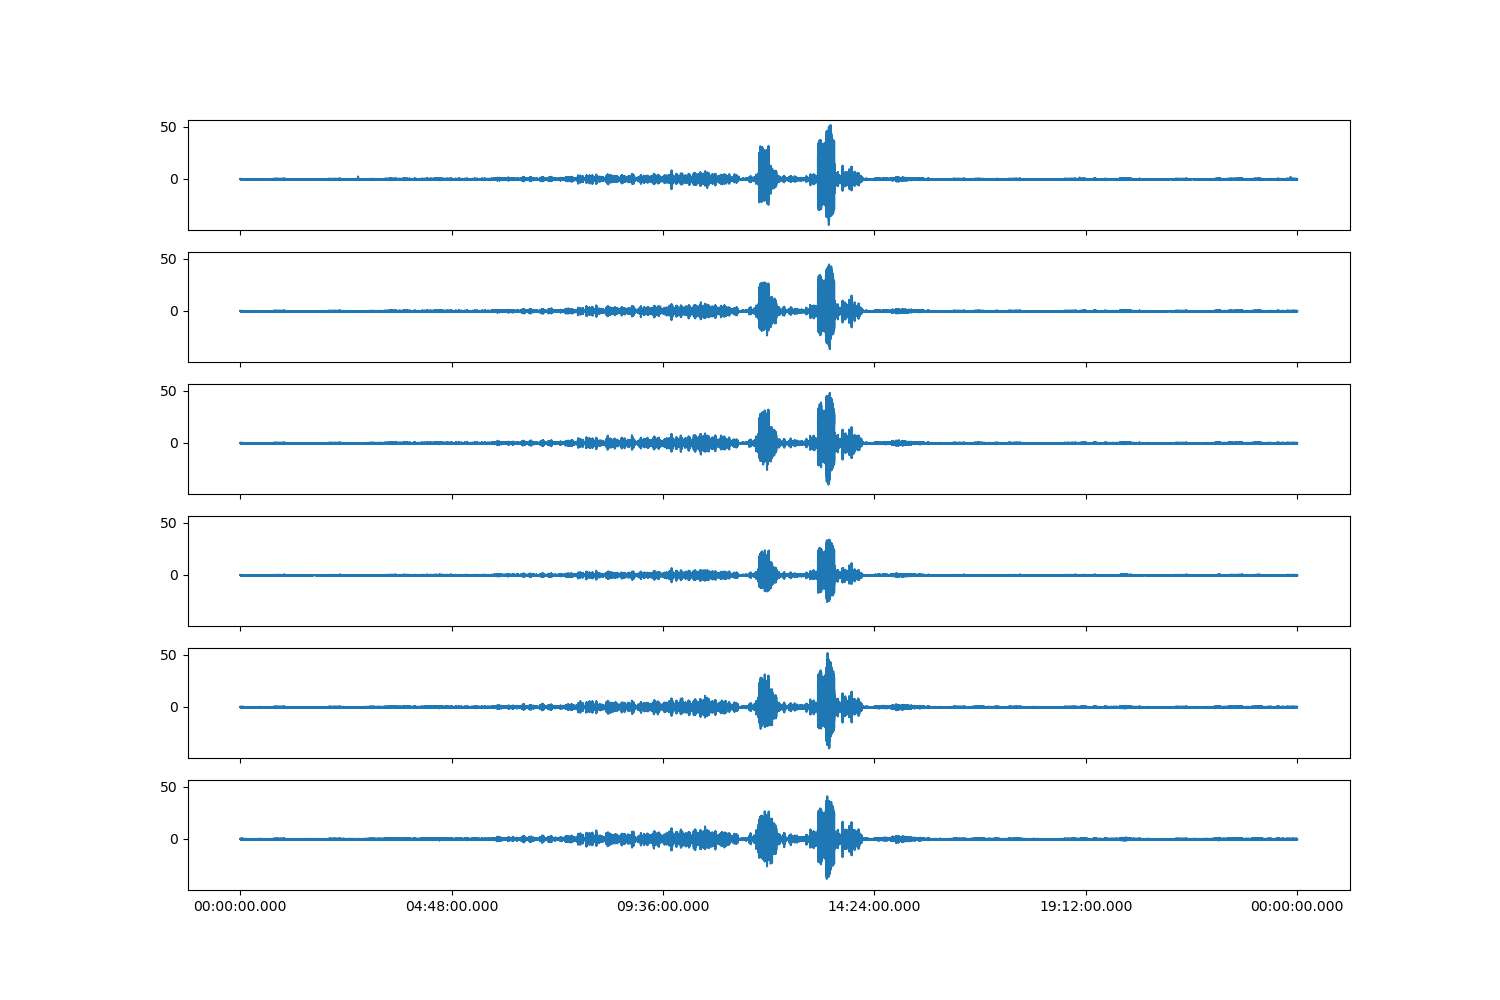

In [13]:
fig, ax = plt.subplots(6, 1, figsize=(15, 10), sharex=True, sharey=True)

for n, tr in enumerate(stream):
    ax[n].plot(tr.times('matplotlib'), tr.data, )
ax[0].xaxis.set_major_formatter(PrecisionDateFormatter('%H:%M:%S.{ms}'))


# fig.tight_layout()